```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture2-Plotting-MachinePrecision.pdf)
```

# Machine precision

Here we explore how computers represent numbers and the implications for scientific computing. We'll examine:

- Integer representation using binary digits
- Floating-point representation (IEEE 754 standard)
- Precision limitations and their effects on calculations
- Common numerical issues like overflow, underflow, and round-off errors
- Strategies for mitigating precision problems in scientific computing

## Integer representation

Numbers on a computer are represented by bits – sequences of 0s and 1s.

For integers, the representation typically includes:
- A sign bit (0 for positive, 1 for negative)
- A sequence of binary digits

For example:
```{figure} image1.png
---
scale: 60%
align: left
---
```
```{figure} image2.png
---
scale: 65%
align: right
---
```


<br>
<br>

<!-- - +5 can be represented as 00101 (5 bits)
![image.png](image1.png)
- -5 can be represented as 10101 (5 bits)
![image-2.png](image2.png) -->

Most typical native formats:
- 32-bit integer, range −2,147,483,647 (−2³¹) to +2,147,483,647 (2³¹)
- 64-bit integer, range ~ −10¹⁸ (−2⁶³) to +10¹⁸ (2⁶³)

Python supports arbitrarily large integers, but calculations can become slow with very large numbers.

C++ supports natively 32-bit (int) and 64-bit (long long) integers. It is thus important to be aware of the range of values that can be represented to avoid overflow and underflow.

## Floating-Point Number Representation

Floating-point, or real, numbers are represented by a bit sequence as well, which are separated into three components:

- **Sign (S)**: 1 bit indicating positive or negative
- **Exponent (E)**: Controls the magnitude of the number
- **Mantissa (M)**: Contains the significant digits (precision)

The value is calculated as: $x = S \times M \times 2^{E-e}$

For example: $-2195.67 = -2.19567 \times 10^3$

### IEEE 754 Floating-Point Standard

The IEEE 754 standard defines how floating-point numbers are represented in most modern computers.
The two main formats are single precision (32-bit) and double precision (64-bit):

| Format | Sign | Exponent | Mantissa | Approx. Precision | Range |
|--------|------|----------|----------|-------------------|-------|
| Single precision (32-bit) | 1 bit | 8 bits | 23 bits | ~7 decimal digits | ~$-10^{38}$ to $10^{38}$ |
| Double precision (64-bit) | 1 bit | 11 bits | 52 bits | ~16 decimal digits | ~$-10^{308}$ to $10^{308}$ |

### Important Consequences

The main consequence of this representation: **Floating-point numbers are not exact!**

With 52 bits in the mantissa (double precision), we can store about 16 decimal digits of precision. This limitation leads to various numerical issues in scientific computing:

- Round-off errors
- Loss of significance in subtraction of nearly equal numbers
- Accumulation of errors in iterative calculations

### Example 1: Equality test for two floats

Equality tests involving two floating point numbers can be tricky

Consider $x = 1.1 + 2.2$.

The answer should be $x = 3.3$ but due to round-off error one can only assume $x = 3.3 + \varepsilon_M$ where e.g. $\varepsilon_M \sim 10^{-15}$ is the machine precision for 64-bit floating point numbers.

For this reason an equality test $x == 3.3$ might give some unexpected results...

In [1]:
x = 1.1 + 2.2

print("x = ",x)
print(3.3)

if (x == 3.3):
    print("x == 3.3 is True")
else:
    print("x == 3.3 is False")


x =  3.3000000000000003
3.3
x == 3.3 is False


A safer way to compare two floats is to check the equality only within a certain precision $\varepsilon$

In [2]:
print("x = ",x)

# The desired precision
eps = 1.e-15

# The comparison
if (abs(x-3.3) < eps):
    print("x == 3.3 to a precision of",eps,"is True")
else:
    print("x == 3.3 to a precision of",eps,"is False")

x =  3.3000000000000003
x == 3.3 to a precision of 1e-15 is True


In [3]:
import numpy as np

print(np.sqrt(25))

if (np.sqrt(36.+1.e-13) == np.round(np.sqrt(36))):
    print("x == 3.3 is True")
else:
    print("x == 3.3 is False")

5.0
x == 3.3 is False


### Example 2: Subtracting two large numbers with a small difference

Let us have $x = 1$ and $y = 1 + \delta \sqrt{2}$

It follows that 

$$
\delta^{-1} (y - x) = \sqrt{2} = 1.41421356237\dots
$$

Let us test this relation on a computer for a very small value of $\delta = 10^{-14}$

In [4]:
from math import sqrt

delta = 1.e-14
x = 1.
y = 1. + delta * sqrt(2)
print("x = ", x)
print("y = ", y)
res = (1./delta)*(y-x)
print("(y-x) = ",y-x)
print("(1/delta) * (y-x) = ",res)
print("The accurate value is sqrt(2) = ", sqrt(2))
print("The difference is ", res - sqrt(2))

x =  1.0
y =  1.0000000000000142
(y-x) =  1.4210854715202004e-14
(1/delta) * (y-x) =  1.4210854715202004
The accurate value is sqrt(2) =  1.4142135623730951
The difference is  0.006871909147105226


Try smaller/bigger values of $\delta$ and observe the behavior, e.g. $\delta = 10^{-5}$ or $\delta = 10^{-16}$

### Example 3: Roots of the quadratic equation

The quadratic equation 

$$ax^2+bx+c = 0$$ 

has the following two roots

$$
x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

Let us calculate the roots for $a = 10^{-4}$, $b = 10^4$, and $c = 10^{-4}$

In [5]:
a = 1.e-4
b = 1.e4
c = 1.e-4

x1 = (-b + sqrt(b*b - 4.*a*c)) / (2.*a)
x2 = (-b - sqrt(b*b - 4.*a*c)) / (2.*a)

print("x1 = ", x1)
print("x2 = ", x2)

x1 =  -9.094947017729282e-09
x2 =  -100000000.0


Do the results look accurate to you?

The value of $x_1$ is not accurate due to subtracting two large numbers with small difference $b$ and $\sqrt{b^2-4ac}$.

Consider another form of the solution.
By multiplying the numerator and denominator of the above expression for $x_{1,2}$ by $(-b\mp\sqrt{b^2-4ac})$ one obtains

$$
x_{1,2} = \frac{2c}{-b \mp \sqrt{b^2-4ac}}
$$

Let us see what we get now

In [6]:
x1 = 2*c / (-b - sqrt(b*b-4.*a*c))
x2 = 2*c / (-b + sqrt(b*b-4.*a*c))

print("x1 = ", x1)
print("x2 = ", x2)

x1 =  -1e-08
x2 =  -109951162.7776


This time $x_1$ is fine, but not $x_2$.

One, therefore, has to combine the two forms to get accurate results for both $x_1$ and $x_2$.

Consider writing a function which avoids large round-off errors for both $x_1$ and $x_2$

### Exercise: Negative $b$

Consider now the quadratic equation with parameters $a = 10^{-4}$, $b = -10^4$, and $c = 10^{-4}$, where the sign of $b$ is now reversed. 

- Can you calculate both roots $x_{1,2}$ accurately in this case?
- Which form should you use for $x_1$ and which for $x_2$ and why?

### Example 4: Numerical derivative

Consider a function 

$$f(x) = x(x-1)~.$$

Its derivative is 

$$f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} = 2x - 1$$

Let us calculate the derivative numerically by using small but finite values of $h$ ranging from $1$ down to $10^{-16}$ at $x = 1$
and compare it to the correct result, $f'(1) = 1$.

In [7]:
def f(x):
    return x*(x-1.)

def df_exact(x):
    return 2.*x - 1.

def df_numeric(x,h):
    return (f(x+h) - f(x)) / h

print("{:<10} {:<20} {:<20}".format('h',"f'(1)","Relative error"))
x0 = 1.

arr_h = []
arr_df = []
arr_err = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_numeric(x0,h)
    df_err = abs(df_numeric(x0,h) - df_exact(x0)) / df_exact(x0)
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)

h          f'(1)                Relative error      
1          2.0                  1.0                 
0.1        1.100000000000001    0.10000000000000098 
0.01       1.010000000000001    0.010000000000000897
0.001      1.0009999999998895   0.0009999999998895337
0.0001     1.0000999999998899   9.999999988985486e-05
1e-05      1.0000100000065513   1.0000006551269536e-05
1e-06      1.0000009999177333   9.99917733279787e-07
1e-07      1.0000001005838672   1.0058386723521551e-07
1e-08      1.0000000039225287   3.922528746258536e-09
1e-09      1.000000083740371    8.374037108183074e-08
1e-10      1.000000082840371    8.284037100736441e-08
1e-11      1.000000082750371    8.275037099991778e-08
1e-12      1.0000889005833413   8.890058334132256e-05
1e-13      0.9992007221627407   0.0007992778372593046
1e-14      0.9992007221626509   0.0007992778373491216
1e-15      1.1102230246251577   0.11022302462515765 
1e-16      0.0                  1.0                 
1e-17      0.0                  1

The accuracy of our numerical derivative first increases as $h$ becomes smaller, as expected, but then increases again. This is due to large round-off error when $h$ becomes very small compared to $f$.

Let us plot the dependence of the relative accuracy vs $h$

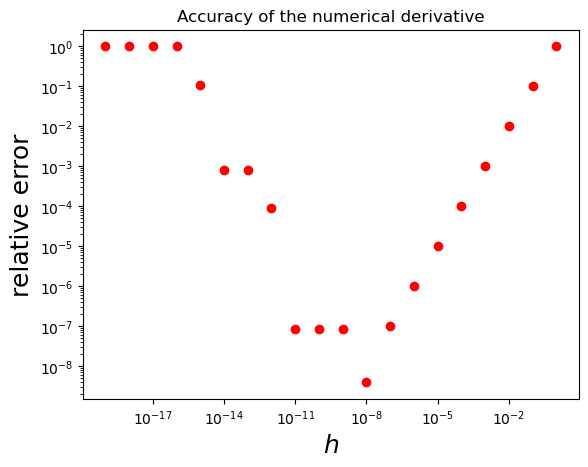

In [8]:
import matplotlib.pyplot as plt

plt.title("Accuracy of the numerical derivative")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.scatter(arr_h, arr_err, color="red")

plt.show()

## High-degree polynomials

High-degree polynomials present special challenges in numerical computing due to floating-point precision limitations. Consider a polynomial of the form:

$$P(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0$$

The coefficients $a_i$ can span many orders of magnitude, especially for high-degree polynomials, leading to precision loss when adding terms.
Furthermore, evaluation of polynomials can be numerically unstable, especially near their roots where the terms can cancel each other out and lead to loss of significant digits. High-degree polynomials are often ill-conditioned, meaning small changes in coefficients can cause large changes in the result.

One famous example is **Wilkinson's polynomial**:

$$W(x) = \prod_{i=1}^{20} (x - i) = (x-1)(x-2)\cdots(x-20)$$

When expanded, this becomes a 20th-degree polynomial with integer roots 1 through 20. However, when the coefficients are slightly perturbed (as happens with floating-point arithmetic), the roots can change dramatically.

For this reason it is often better to use alternative representations for high-degree polynomials, such as using nested multiplication,

$$P(x) = a_0 + x(a_1 + x(a_2 + \ldots + x(a_{n-1} + x a_n)\ldots))$$

factored form $(x-r_1)(x-r_2)\ldots$ or, if possible, recurrence relations as is the case for many special functions.


## Further reading

- [Chapter 4](http://websites.umich.edu/~mejn/cp/chapters/errors.pdf) of *Computational Physics* by Mark Newman
- Chapter 1.1 of [*Numerical Recipes Third Edition*](https://numerical.recipes/book.html) by W.H. Press et al.
- [Arbitrary precision arithmetic](https://en.wikipedia.org/wiki/Arbitrary-precision_arithmetic)
- [Kahan Summation Algorithm](https://en.wikipedia.org/wiki/Kahan_summation_algorithm)